### Imports

In [1]:
%cd ..

/home/ds/DataScience/home/ademyanchuk/Projects/ulmfit-multilingual


In [2]:
!pwd

/home/ds/DataScience/home/ademyanchuk/Projects/ulmfit-multilingual


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.text import *

In [5]:
from ulmfit.pretrain_lm import *

In [6]:
cuda_id = 1
torch.cuda.set_device(cuda_id)

### Preparing data

In [7]:
# batch size
bs = 30

In [8]:
# use data from smaller sample of wiki
# data is recieved through prepare_wiki.sh script
wiki_data_path = Path('data/wiki/ru-100-unk/')

In [9]:
wiki_data_path.ls()

[PosixPath('data/wiki/ru-100-unk/ru.wiki.test.tokens'),
 PosixPath('data/wiki/ru-100-unk/ru.wiki.valid.tokens'),
 PosixPath('data/wiki/ru-100-unk/ru.wiki.train.tokens'),
 PosixPath('data/wiki/ru-100-unk/models'),
 PosixPath('data/wiki/ru-100-unk/tmp_lm'),
 PosixPath('data/wiki/ru-100-unk/ru.wiki.train.tokens.temp')]

In [11]:
# provide train and valid path
trn_path = wiki_data_path/'ru.wiki.train.tokens'
val_path = wiki_data_path/'ru.wiki.valid.tokens'

In [12]:
# create a databunch object from data_frames
# data_frames are provided through `read_wiki_articles` function
# from `ulmfit.pretrain_lm`
data_lm = TextLMDataBunch.from_df(path=wiki_data_path, train_df=read_wiki_articles(trn_path),
                                  valid_df=read_wiki_articles(val_path), 
                                  classes=None, bs=bs, text_cols='texts')

In [13]:
itos = data_lm.vocab.itos
print('Size of vocabulary:', len(itos))
print('First 20 words in vocab:', itos[:20])

Size of vocabulary: 60003
First 20 words in vocab: ['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', ',', '.', '–≤', '–∏', '\n \n ', '–Ω–∞', ')', '(', '\n ', '‚Äî', '¬´', '¬ª']


In [14]:
len(data_lm.train_ds), len(data_lm.valid_ds)

(189786, 447)

In [15]:
data_lm.train_ds[0][0]

Text xxbos = xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ = 
  xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ 
 
  xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ ( ) ‚Äî –≤–∏–¥ –ø—Ç–∏—Ü –∏–∑ —Å–µ–º–µ–π—Å—Ç–≤–∞ xxunk ( xxmaj xxunk ) , –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –≤ —Ä–æ–¥–µ xxunk xxunk ( & ' xxmaj xxunk & ' ) . 
 
  xxmaj –æ–ø–∏—Å–∞–Ω–∏–µ . 
  xxmaj –¥–ª–∏–Ω–∞ —Ç–µ–ª–∞ –æ–∫–æ–ª–æ 35 —Å–º . xxmaj —Å–ø–∏–Ω–∞ –∏ –≤–µ—Ä—Ö –∫—Ä—ã–ª—å–µ–≤ —Å–µ—Ä–æ - xxunk , –≥–æ–ª–æ–≤–∞ , –≥—Ä—É–¥—å –∏ –±—Ä—é—à–∫–æ —Ä–æ–∑–æ–≤—ã–µ , –Ω–∞ —à–µ–µ —É–∑–∫–∏–π —á—ë—Ä–Ω—ã–π xxunk . xxmaj –∫–ª—é–≤ —á—ë—Ä–Ω—ã–π , –Ω–æ–≥–∏ –∫—Ä–∞—Å–Ω—ã–µ . xxmaj —Ö–≤–æ—Å—Ç xxunk —Ñ–æ—Ä–º—ã . 
 
  xxmaj –ø–æ–ª—ë—Ç —Ä–æ–∑–æ–≤–æ–π —á–∞–π–∫–∏ –ª—ë–≥–∫–∏–π , –Ω–∞–ø–æ–º–∏–Ω–∞—é—â–∏–π –ø–æ–ª—ë—Ç xxunk . xxmaj –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ —á–µ–ª–æ–≤–µ–∫—É –ø—Ç–∏—Ü–∞ –æ–±—ã—á–Ω–æ –º–∞–ª–æ xxunk –∏ xxunk . xxmaj –Ω–∞ –º–æ—Ä–µ –æ–Ω–∞ –≥–ª–∞–≤–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –¥–µ—Ä–∂–∏—Ç—Å—è –Ω–∞ –ø–ª–∞–≤–∞—é—â–∏—Ö xxunk , –∞ –≤–æ—Ç –≤ xxunk , –Ω–∞ –æ–∑—ë—Ä–∞—Ö , —á–∞–π–∫–∞ —á–∞—Å—Ç–æ —Å–∞–¥–∏—Ç—Å—è –Ω–∞ 

In [11]:
data_lm.show_batch()

In [17]:
# save databunch
data_lm.save('tmp_lm')

In [10]:
# load databunch
data_lm = TextLMDataBunch.load(wiki_data_path, 'tmp_lm', bs=bs)

#### Create Learner and train Language Model

In [12]:
# create learner for training on wiki from scratch
learner = language_model_learner(data=data_lm, drop_mult=1.0)

In [13]:
learner.load('ru-100-unk-best')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (189786 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/wiki/ru-100-unk
x: LMTextList (189786 items)
[Text xxbos = xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ = 
  xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ 
 
  xxmaj —Ä–æ–∑–æ–≤–∞—è —á–∞–π–∫–∞ ( ) ‚Äî –≤–∏–¥ –ø—Ç–∏—Ü –∏–∑ —Å–µ–º–µ–π—Å—Ç–≤–∞ xxunk ( xxmaj xxunk ) , –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –≤ —Ä–æ–¥–µ xxunk xxunk ( & ' xxmaj xxunk & ' ) . 
 
  xxmaj –æ–ø–∏—Å–∞–Ω–∏–µ . 
  xxmaj –¥–ª–∏–Ω–∞ —Ç–µ–ª–∞ –æ–∫–æ–ª–æ 35 —Å–º . xxmaj —Å–ø–∏–Ω–∞ –∏ –≤–µ—Ä—Ö –∫—Ä—ã–ª—å–µ–≤ —Å–µ—Ä–æ - xxunk , –≥–æ–ª–æ–≤–∞ , –≥—Ä—É–¥—å –∏ –±—Ä—é—à–∫–æ —Ä–æ–∑–æ–≤—ã–µ , –Ω–∞ —à–µ–µ —É–∑–∫–∏–π —á—ë—Ä–Ω—ã–π xxunk . xxmaj –∫–ª—é–≤ —á—ë—Ä–Ω—ã–π , –Ω–æ–≥–∏ –∫—Ä–∞—Å–Ω—ã–µ . xxmaj —Ö–≤–æ—Å—Ç xxunk —Ñ–æ—Ä–º—ã . 
 
  xxmaj –ø–æ–ª—ë—Ç —Ä–æ–∑–æ–≤–æ–π —á–∞–π–∫–∏ –ª—ë–≥–∫–∏–π , –Ω–∞–ø–æ–º–∏–Ω–∞—é—â–∏–π –ø–æ–ª—ë—Ç xxunk . xxmaj –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ —á–µ–ª–æ–≤–µ–∫—É –ø—Ç–∏—Ü–∞ –æ–±—ã—á–Ω–æ –º–∞–ª–æ xxu

In [14]:
# change Adam default params
learner.opt_func = partial(optim.Adam, betas=(0.8, 0.99))

In [15]:
learner.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.8, 0.99))

In [16]:
learner.metrics

[<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.LongTensor) -> <function NewType.<locals>.new_type at 0x7fb0d165cf28>>]

In [17]:
# add save callback
learner.callback_fns += [partial(SaveModelCallback, every='epoch', name='lm')]

In [18]:
learner.callback_fns

[fastai.basic_train.Recorder,
 functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, every='epoch', name='lm')]

In [19]:
# unfreeze all layers
learner.unfreeze()

In [25]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


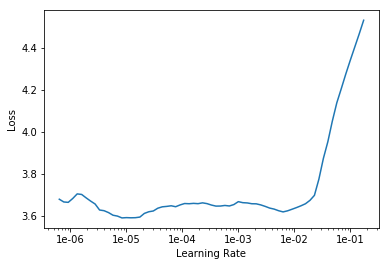

In [26]:
learner.recorder.plot(skip_end=15)

In [22]:
# define non-default momentums
moms=(0.8,0.7)

In [23]:
learner.fit_one_cycle(4, 1e-3, moms=moms)

In [24]:
# save model
learner.save('ru-100-unk-best')

In [ ]:
# cell to restart notebook kernel from within
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

### Fine tune on ruSentEval Unsupervised data

http://study.mokoron.com/ - I get sample data from ~17M tweets database

In [7]:
# path for ruSentiment data
rusent_data_path = Path('data/ruSentiment/')

In [8]:
bs = 48

In [9]:
rusent_data_path.ls()

[PosixPath('data/ruSentiment/merg_rusenteval_rusent.csv'),
 PosixPath('data/ruSentiment/models'),
 PosixPath('data/ruSentiment/unsup_sample.csv'),
 PosixPath('data/ruSentiment/tmp_clas'),
 PosixPath('data/ruSentiment/tmp_lm'),
 PosixPath('data/ruSentiment/rusentiment_random_posts.csv'),
 PosixPath('data/ruSentiment/unsup-no-null.csv'),
 PosixPath('data/ruSentiment/rusentiment_test.csv'),
 PosixPath('data/ruSentiment/rusentiment_preselected_posts.csv')]

In [10]:
# create LM DataBunch from ruSentEval unsupervised corpus of tweets sample (http://study.mokoron.com/)
data1_lm = TextLMDataBunch.from_csv(rusent_data_path, 'unsup_sample.csv', text_cols=0,
                                    valid_pct=0.1, bs=bs)

In [11]:
itos, stoi, data_path = data1_lm.vocab.itos, data1_lm.vocab.stoi, data1_lm.path
print('Size of vocabulary:', len(itos))
print('First 20 words in vocab:', itos[:20])
print(str(data_path))

Size of vocabulary: 60003
First 20 words in vocab: ['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', '/', ':', ',', 'http', 't.co', '.', '–≤', '#', 'rt', '–∏', '–Ω–µ', '-']
data/ruSentiment


In [12]:
(data1_lm.path).ls()

[PosixPath('data/ruSentiment/merg_rusenteval_rusent.csv'),
 PosixPath('data/ruSentiment/train'),
 PosixPath('data/ruSentiment/valid'),
 PosixPath('data/ruSentiment/models'),
 PosixPath('data/ruSentiment/unsup_sample.csv'),
 PosixPath('data/ruSentiment/tmp_clas'),
 PosixPath('data/ruSentiment/tmp_lm'),
 PosixPath('data/ruSentiment/rusentiment_random_posts.csv'),
 PosixPath('data/ruSentiment/unsup-no-null.csv'),
 PosixPath('data/ruSentiment/rusentiment_test.csv'),
 PosixPath('data/ruSentiment/rusentiment_preselected_posts.csv')]

In [13]:
len(data1_lm.train_ds), len(data1_lm.valid_ds)

(1799487, 199944)

In [10]:
data1_lm.show_batch()

In [16]:
data1_lm.train_ds[0]

(Text xxbos xxup rt xxunk : –≤ xxunk –¥–≤–µ—Ä—å , xxunk –Ω–∞ –ø–æ—Ä–æ–≥–µ , xxunk xxunk –ø–æ—Ö–æ–¥–∫–æ–π xxunk –∏ xxunk .,
 Category 0)

In [17]:
# save data bunch 
data1_lm.save('tmp_lm')

In [10]:
data1_lm = TextLMDataBunch.load(rusent_data_path, 'tmp_lm', bs=bs)

#### Create Learner and Finetune model from pretrained fnames

In [11]:
# pretrained model and vocab from first step of training LM
pretrained_fnames = ['ru-100-unk-best', 'itos']

In [12]:
# create learner and provide pretrained files to finetune wiki-LM with ruSentiment data
learner = language_model_learner(data1_lm, pretrained_fnames=pretrained_fnames, drop_mult=1.0)

Unknown tokens 32987, first 100: ['t.co', 'rt', '"', 'mtvstars', 'seconds', 'direction', '–≥–¥–∑', ':)', '\xa0', ':d', 'gameinsight', '\n\n', ':3', '—Ä–µ—à–µ–±–Ω–∏–∫', 'androidgames', '—à–ª—é—Ö–∏', '–∏–º–±–∏—Ä–µ–º', '–±–ª—è—Ç—å', '–±–ª–∏–Ω', '–±–ª—è', 'justin', 'bieber', '–∞—Ö–∞—Ö', '–Ω–µ–Ω–∞–≤–∏–∂—É', '–ø–æ–π–¥—É', '–∞—Ö–∞—Ö–∞', '¬©', '@youtube', '—î–≤—Ä–æ–º–∞–π–¥–∞–Ω', '–º–∞—Å—Å–∞–∂', '–ø–∏–∑–¥–µ—Ü', '—Ç–≤–∏—Ç', 'Ô∏è', '—Ö–¥', 'ipadgames', '—Å–∏–∂—É', '–ø–æ—Ö—É–¥–µ–Ω–∏—è', '—Å—É–∫–∞', '—Ç–≤–∏—Ç—Ç–µ—Ä', ':(', '–ª–∞–¥–Ω–æ', '—Å–º–æ—Ç—Ä—é', '–µ–≤—Ä–æ–º–∞–π–¥–∞–Ω', '–∞—Ö–∞—Ö–∞—Ö', '–∞–Ω–¥—Ä–æ–∏–¥', '\n\n ', '–∂–¥—É', ';)', '–Ω–∞—Ö—É–π', '–ª–æ–ª', '—É—Ä–æ–∫–∞', '—Ç–æ—Ä—Ä–µ–Ω—Ç', '–∫–æ–Ω—Å–ø–µ–∫—Ç', '\xa0 ', '‚ù§', '–æ–±–æ–∂–∞—é', '–ø—Ä—è–º', '—Ö–æ—á—É–ø—Ä–æ–≤–µ—Å—Ç–∏–Ω–æ–≤–æ–≥–æ–¥–Ω—é—é–Ω–æ—á—å–≤–º–µ—Å—Ç–µ—Å', '–±–µ—Å–∏—Ç', '–±–æ–ª–∏—Ç', ':-)', '–º–∞–π–¥–∞–Ω', '—â–∞—Å', '–¥p', '4–æ', 'o5', '–æ5', '^^', '—Ä–µ—Ç–≤–∏—Ç', '–∏—â—É', '4o', '–±–ª', '‚ô•', '—Ñ–≥–æ—Å', '11.12.13', '–ø—Ä–æ–≤–µ—Ä—å'

In [13]:
learner.callback_fns += [partial(CSVLogger, filename=f"{learner.model_dir}/lm-history"),
                         partial(SaveModelCallback, every='epoch', name='lm')]

In [14]:
learner.callback_fns

[fastai.basic_train.Recorder,
 functools.partial(<class 'fastai.callbacks.csv_logger.CSVLogger'>, filename='models/lm-history'),
 functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, every='epoch', name='lm')]

In [15]:
learner.opt_func = partial(optim.Adam, betas=(0.8, 0.99))

In [16]:
learner.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.8, 0.99))

In [17]:
learner.true_wd

True

In [18]:
learner.metrics

[<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.LongTensor) -> <function NewType.<locals>.new_type at 0x7fa75f4e4f28>>]

In [18]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


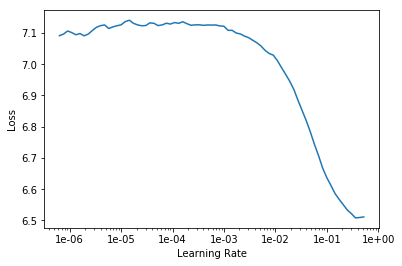

In [19]:
learner.recorder.plot(skip_end=15)

In [19]:
moms = (0.8, 0.7)

In [21]:
# learning the same way as in fastai v1 examples
learner.fit_one_cycle(1, 2e-2, moms=moms)

In [22]:
learner.save('fit_head')

In [23]:
learner.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (1799487 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/ruSentiment
x: LMTextList (1799487 items)
[Text xxbos xxup rt xxunk : –≤ xxunk –¥–≤–µ—Ä—å , xxunk –Ω–∞ –ø–æ—Ä–æ–≥–µ , xxunk xxunk –ø–æ—Ö–æ–¥–∫–æ–π xxunk –∏ xxunk ., Text xxbos xxmaj —Å–º–µ—Ä—Ç—å —Å—Ç—É—á–∏—Ç—Å—è –∫–æ –≤—Å–µ–º –æ–¥–∏–Ω–∞–∫–æ–≤–æ ., Text xxbos xxunk –ø–æ—Ö–æ–∂–µ —Ç—ã xxunk :), Text xxbos xxmaj –º—É–∂—á–∏–Ω–∞ –¥–æ–ª–∂–µ–Ω –Ω–∞–π—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—É—é —Ü–µ–ª—å –≤ –∂–∏–∑–Ω–∏ , –∞ –∂–µ–Ω—â–∏–Ω–∞ ‚Äî –º—É–∂—á–∏–Ω—É —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ü–µ–ª—å—é . xxunk xxmaj —à–æ—É, Text xxbos xxup rt @dany_belik : xxmaj —à–∏–∑–æ—Ñ—Ä–µ–Ω–∏—è - —ç—Ç–æ —É–¥–æ–±–Ω–æ . xxmaj –≤—Å–µ–≥–¥–∞ –µ—Å—Ç—å —Å –∫–µ–º xxunk]...
Path: data/ruSentiment;

Valid: LabelList
y: LMLabel (199944 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/ruSentiment
x: LMTextList (199944 items)
[Text xxbos xxunk –¥–∞, Text xxbos @n

In [24]:
learner.unfreeze()

In [25]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


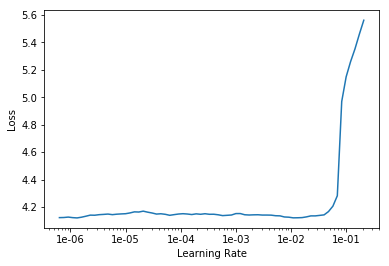

In [26]:
learner.recorder.plot(skip_end=15)

In [27]:
learner.fit_one_cycle(10, 1e-3, moms=moms)

In [28]:
# save fine_tuned model
learner.save('fine_tuned')

In [29]:
# save finetuned models encoder to use for classification task
learner.save_encoder('fine_tuned_enc')

In [20]:
learner.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (1799487 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/ruSentiment
x: LMTextList (1799487 items)
[Text xxbos xxup rt xxunk : –≤ xxunk –¥–≤–µ—Ä—å , xxunk –Ω–∞ –ø–æ—Ä–æ–≥–µ , xxunk xxunk –ø–æ—Ö–æ–¥–∫–æ–π xxunk –∏ xxunk ., Text xxbos xxmaj —Å–º–µ—Ä—Ç—å —Å—Ç—É—á–∏—Ç—Å—è –∫–æ –≤—Å–µ–º –æ–¥–∏–Ω–∞–∫–æ–≤–æ ., Text xxbos xxunk –ø–æ—Ö–æ–∂–µ —Ç—ã xxunk :), Text xxbos xxmaj –º—É–∂—á–∏–Ω–∞ –¥–æ–ª–∂–µ–Ω –Ω–∞–π—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—É—é —Ü–µ–ª—å –≤ –∂–∏–∑–Ω–∏ , –∞ –∂–µ–Ω—â–∏–Ω–∞ ‚Äî –º—É–∂—á–∏–Ω—É —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ü–µ–ª—å—é . xxunk xxmaj —à–æ—É, Text xxbos xxup rt @dany_belik : xxmaj —à–∏–∑–æ—Ñ—Ä–µ–Ω–∏—è - —ç—Ç–æ —É–¥–æ–±–Ω–æ . xxmaj –≤—Å–µ–≥–¥–∞ –µ—Å—Ç—å —Å –∫–µ–º xxunk]...
Path: data/ruSentiment;

Valid: LabelList
y: LMLabel (199944 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/ruSentiment
x: LMTextList (199944 items)
[Text xxbos xxunk –¥–∞, Text xxbos @n

In [21]:
learner.unfreeze()

In [22]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


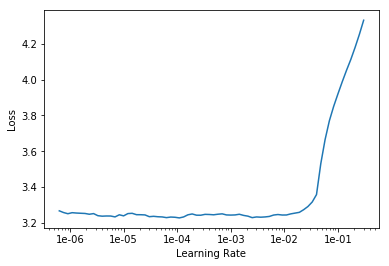

In [23]:
learner.recorder.plot(skip_end=15)

In [24]:
# trying 10 more iterations to fintune
learner.fit_one_cycle(10, 1e-3, moms=moms)

In [25]:
# save fine_tuned model
learner.save('fine_tuned')

In [26]:
# save finetuned models encoder to use for classification task
learner.save_encoder('fine_tuned_enc')

In [ ]:
# cell to restart notebook kernel from within
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [27]:
# check text generation with LM
TEXT = "—Å–µ–≥–æ–¥–Ω—è —É—Ç—Ä–æ–º —è"
N_WORDS = 10
N_SENTENCES = 2

In [28]:
print("\n".join(learner.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

—Å–µ–≥–æ–¥–Ω—è —É—Ç—Ä–æ–º —è –ø–æ—Ä–æ–∫–∏ —Ä–æ—Å–æ–º–∞—Ö–∞ —Å–Ω–∏–º–∞—é –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–ª–∏ —Ñ–∏–Ω–ª—è–Ω–¥–∏—é –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ –ø–æ—Å–∞–¥–∏—Ç @homutoov –≤—Ä–µ–¥–Ω–æ –æ—Ç–∫—Ä—ã–≤–∞—é—Ç—Å—è
—Å–µ–≥–æ–¥–Ω—è —É—Ç—Ä–æ–º —è –¥–µ–∫–∞–±—Ä —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –∫–µ—à–∞ —Ñ—Ä–∞–≥–º–µ–Ω—Ç –∏–Ω—Ç–∏–º–¥–æ—Å—É–≥ —Å–ª–∞–≤–µ –ø–∞—Ä–∞–∑–∏—Ç —Ä–∞—Å—Ç—É—â–∏–µ —Ä–æ–¥–∞ @sweetmolko


### Classifier

Here we are working on ruSentiment classification task from http://text-machine.cs.uml.edu/projects/rusentiment/

In [11]:
rusent_data_path.ls()

[PosixPath('data/ruSentiment/merg_rusenteval_rusent.csv'),
 PosixPath('data/ruSentiment/models'),
 PosixPath('data/ruSentiment/unsup_sample.csv'),
 PosixPath('data/ruSentiment/tmp_clas'),
 PosixPath('data/ruSentiment/tmp_lm'),
 PosixPath('data/ruSentiment/rusentiment_random_posts.csv'),
 PosixPath('data/ruSentiment/unsup-no-null.csv'),
 PosixPath('data/ruSentiment/rusentiment_test.csv'),
 PosixPath('data/ruSentiment/rusentiment_preselected_posts.csv')]

In [12]:
rand = pd.read_csv(rusent_data_path/'rusentiment_random_posts.csv')
presel = pd.read_csv(rusent_data_path/'rusentiment_preselected_posts.csv')

In [13]:
# create classification databunch, please note usage of LM vocab
# as a train data we use both random posts and preselected posts
# and testset to mesure quality of classifier
data_clas = TextClasDataBunch.from_df(path=rusent_data_path,
                                      train_df=pd.concat([rand, presel], ignore_index=True),
                                      valid_df=pd.read_csv(rusent_data_path/'rusentiment_test.csv'),
                                      vocab=data1_lm.vocab, text_cols='text', label_cols='label', bs=bs)

In [14]:
data_clas.show_batch()

In [15]:
# number of classes
data_clas.train_ds.c

5

In [16]:
# classes labels
data_clas.train_ds.classes

['negative', 'neutral', 'positive', 'skip', 'speech']

In [17]:
data_clas

TextClasDataBunch;

Train: LabelList
y: CategoryList (28218 items)
[Category negative, Category speech, Category skip, Category negative, Category skip]...
Path: data/ruSentiment
x: TextList (28218 items)
[Text xxbos –∞ –ø–æ–ø–∞ xxunk –¥–∞–≤–Ω–æ , —á—Ç–æ —Ç—ã —Å –∫–∞–≤–∫–∞–∑–∞ .. –ø–µ—Ä–µ—Å—Ç–∞–Ω—É –æ–±—â–∞—Ç—å—Å—è —Å —Ç–æ–±–æ–π, Text xxbos –∑ –ø—Ä–æ—à–µ–¥—à–∏–º xxmaj –¥–Ω–µ–º xxmaj –∞–Ω–≥–µ–ª–∞ xxrep 8 ), Text xxbos xxmaj –¥–≤–∞ –¥–Ω—è –¥–æ xxunk —Å –æ—Å—Ç—Ä–æ–≤–∞ xxrep 7 !, Text xxbos xxmaj –±–ª–∏–Ω , –ø–æ—á–µ–º—É —ç—Ç–∞ –∂–∏–∑–Ω—å —Å—Ç–æ–ª—å –Ω–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞ xxrep 4 (, Text xxbos –≥–¥–µ –µ—â–µ –≤—Å—Ç—Ä–µ—á–∞—Ç—å —Å–≤–æ–π –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –∫–∞–∫ –Ω–µ –Ω–∞ –∫–ª–∞–¥–±–∏—â–µ xxrep 4 )]...
Path: data/ruSentiment;

Valid: LabelList
y: CategoryList (2967 items)
[Category neutral, Category positive, Category neutral, Category skip, Category speech]...
Path: data/ruSentiment
x: TextList (2967 items)
[Text xxbos xxmaj –∞–ª–µ–∫—Å–∞–Ω–¥—Ä , —Ç–µ–±–µ –∫ –ª–∏—Ü—É —ç—Ç–∞ –ø—É—à

In [18]:
len(data_clas.vocab.itos)

60003

In [19]:
data_clas.batch_size

24

In [20]:
# save for future use
data_clas.save('tmp_clas')

In [10]:
data_clas = TextClasDataBunch.load(rusent_data_path, 'tmp_clas', bs=bs)

#### Training

In [21]:
# create learner and train
# train classifier as in fastai imdb example
learner = text_classifier_learner(data=data_clas, drop_mult=0.5)

In [22]:
# load fine tuned encoder
learner.load_encoder('fine_tuned_enc')

In [23]:
learner.callback_fns += [partial(SaveModelCallback, every='epoch', name='cls')]

In [24]:
learner.freeze()

In [25]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


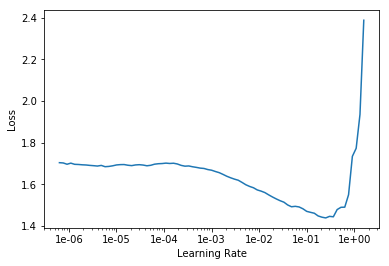

In [26]:
learner.recorder.plot()

In [27]:
moms=(0.8,0.7)

In [28]:
learner.fit_one_cycle(1, 2e-2, moms=moms)

In [29]:
learner.save('first')

In [14]:
learner.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (21268 items)
[Category negative, Category speech, Category skip, Category negative, Category skip]...
Path: .
x: TextList (21268 items)
[Text xxbos –∞ –ø–æ–ø–∞ –ø–æ–¥–æ–∑—Ä–µ–≤–∞–ª–∞ –¥–∞–≤–Ω–æ , —á—Ç–æ —Ç—ã —Å –∫–∞–≤–∫–∞–∑–∞ .. –ø–µ—Ä–µ—Å—Ç–∞–Ω—É –æ–±—â–∞—Ç—å—Å—è —Å —Ç–æ–±–æ–π, Text xxbos –∑ –ø—Ä–æ—à–µ–¥—à–∏–º xxmaj –¥–Ω–µ–º xxmaj –∞–Ω–≥–µ–ª–∞ xxrep 8 ), Text xxbos xxmaj –¥–≤–∞ –¥–Ω—è –¥–æ xxunk —Å –æ—Å—Ç—Ä–æ–≤–∞ xxrep 7 !, Text xxbos xxmaj –±–ª–∏–Ω , –ø–æ—á–µ–º—É —ç—Ç–∞ –∂–∏–∑–Ω—å —Å—Ç–æ–ª—å –Ω–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞ xxrep 4 (, Text xxbos –≥–¥–µ –µ—â–µ –≤—Å—Ç—Ä–µ—á–∞—Ç—å —Å–≤–æ–π –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –∫–∞–∫ –Ω–µ –Ω–∞ –∫–ª–∞–¥–±–∏—â–µ xxrep 4 )]...
Path: data/ruSentiment;

Valid: LabelList
y: CategoryList (2967 items)
[Category neutral, Category positive, Category neutral, Category skip, Category speech]...
Path: .
x: TextList (2967 items)
[Text xxbos xxmaj –∞–ª–µ–∫—Å–∞–Ω–¥—Ä , —Ç–µ–±–µ –∫ –ª–∏—Ü—É —ç—Ç–∞ –ø—

In [30]:
learner.freeze_to(-2)

In [31]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


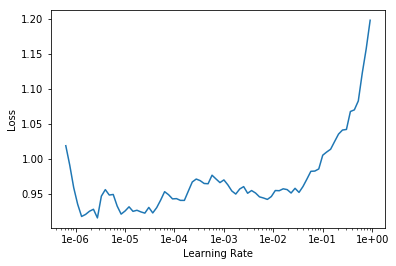

In [32]:
learner.recorder.plot()

In [33]:
learner.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=moms)

In [34]:
learner.save('second')

In [36]:
learner.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (21268 items)
[Category negative, Category speech, Category skip, Category negative, Category skip]...
Path: .
x: TextList (21268 items)
[Text xxbos –∞ –ø–æ–ø–∞ –ø–æ–¥–æ–∑—Ä–µ–≤–∞–ª–∞ –¥–∞–≤–Ω–æ , —á—Ç–æ —Ç—ã —Å –∫–∞–≤–∫–∞–∑–∞ .. –ø–µ—Ä–µ—Å—Ç–∞–Ω—É –æ–±—â–∞—Ç—å—Å—è —Å —Ç–æ–±–æ–π, Text xxbos –∑ –ø—Ä–æ—à–µ–¥—à–∏–º xxmaj –¥–Ω–µ–º xxmaj –∞–Ω–≥–µ–ª–∞ xxrep 8 ), Text xxbos xxmaj –¥–≤–∞ –¥–Ω—è –¥–æ xxunk —Å –æ—Å—Ç—Ä–æ–≤–∞ xxrep 7 !, Text xxbos xxmaj –±–ª–∏–Ω , –ø–æ—á–µ–º—É —ç—Ç–∞ –∂–∏–∑–Ω—å —Å—Ç–æ–ª—å –Ω–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞ xxrep 4 (, Text xxbos –≥–¥–µ –µ—â–µ –≤—Å—Ç—Ä–µ—á–∞—Ç—å —Å–≤–æ–π –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –∫–∞–∫ –Ω–µ –Ω–∞ –∫–ª–∞–¥–±–∏—â–µ xxrep 4 )]...
Path: data/ruSentiment;

Valid: LabelList
y: CategoryList (2967 items)
[Category neutral, Category positive, Category neutral, Category skip, Category speech]...
Path: .
x: TextList (2967 items)
[Text xxbos xxmaj –∞–ª–µ–∫—Å–∞–Ω–¥—Ä , —Ç–µ–±–µ –∫ –ª–∏—Ü—É —ç—Ç–∞ –ø—

In [35]:
learner.freeze_to(-3)

In [36]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


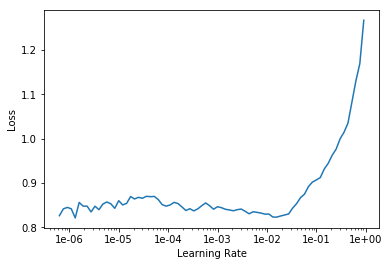

In [37]:
learner.recorder.plot()

In [38]:
learner.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=moms)

In [39]:
learner.save('third')

In [40]:
learner.unfreeze()

In [41]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


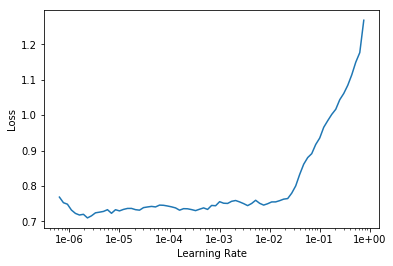

In [42]:
learner.recorder.plot()

In [43]:
learner.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=moms)

In [45]:
learner.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=moms)

In [46]:
learner.save('best-classifier')

In [114]:
learner.load('best-classifier')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (28218 items)
[Category negative, Category speech, Category skip, Category negative, Category skip]...
Path: data/ruSentiment
x: TextList (28218 items)
[Text xxbos –∞ –ø–æ–ø–∞ xxunk –¥–∞–≤–Ω–æ , —á—Ç–æ —Ç—ã —Å –∫–∞–≤–∫–∞–∑–∞ .. –ø–µ—Ä–µ—Å—Ç–∞–Ω—É –æ–±—â–∞—Ç—å—Å—è —Å —Ç–æ–±–æ–π, Text xxbos –∑ –ø—Ä–æ—à–µ–¥—à–∏–º xxmaj –¥–Ω–µ–º xxmaj –∞–Ω–≥–µ–ª–∞ xxrep 8 ), Text xxbos xxmaj –¥–≤–∞ –¥–Ω—è –¥–æ xxunk —Å –æ—Å—Ç—Ä–æ–≤–∞ xxrep 7 !, Text xxbos xxmaj –±–ª–∏–Ω , –ø–æ—á–µ–º—É —ç—Ç–∞ –∂–∏–∑–Ω—å —Å—Ç–æ–ª—å –Ω–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞ xxrep 4 (, Text xxbos –≥–¥–µ –µ—â–µ –≤—Å—Ç—Ä–µ—á–∞—Ç—å —Å–≤–æ–π –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –∫–∞–∫ –Ω–µ –Ω–∞ –∫–ª–∞–¥–±–∏—â–µ xxrep 4 )]...
Path: data/ruSentiment;

Valid: LabelList
y: CategoryList (2967 items)
[Category neutral, Category positive, Category neutral, Category skip, Category speech]...
Path: data/ruSentiment
x: TextList (2967 items)
[Text xxbos xxmaj –∞–ª–µ–∫—Å–∞–Ω–¥—Ä , —Ç–µ–±–µ –∫ –ª–∏—Ü

In [47]:
# sanity check for accuracy, precision, recall and f1-score
preds, targets = learner.get_preds()

In [48]:
targets.unique()

tensor([4, 0, 2, 3, 1])

In [49]:
pred_classes = torch.argmax(preds, dim=1)

In [50]:
np.set_printoptions(precision=3)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(targets, pred_classes, 
                            target_names=data_clas.train_ds.classes, digits=4))

              precision    recall  f1-score   support

    negative     0.5871    0.6008    0.5939       258
     neutral     0.8018    0.7606    0.7806      1420
    positive     0.6252    0.7034    0.6620       536
        skip     0.5110    0.4682    0.4887       346
      speech     0.8968    0.9607    0.9276       407

   micro avg     0.7297    0.7297    0.7297      2967
   macro avg     0.6844    0.6987    0.6906      2967
weighted avg     0.7303    0.7297    0.7291      2967



In [54]:
# check prediction for one example
learner.predict('—Å–æ–º–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–∞')

(Category neutral,
 tensor(1),
 tensor([6.0323e-02, 5.8972e-01, 2.2328e-01, 1.2659e-01, 8.7127e-05]))

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 155   68   15   19    1]
 [  74 1080  160   93   13]
 [  11   88  377   39   21]
 [  24  105   45  162   10]
 [   0    6    6    4  391]]
Normalized confusion matrix
[[0.601 0.264 0.058 0.074 0.004]
 [0.052 0.761 0.113 0.065 0.009]
 [0.021 0.164 0.703 0.073 0.039]
 [0.069 0.303 0.13  0.468 0.029]
 [0.    0.015 0.015 0.01  0.961]]


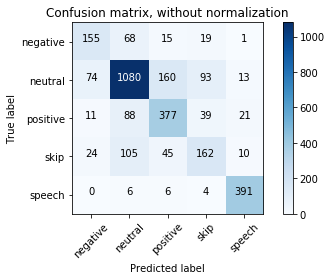

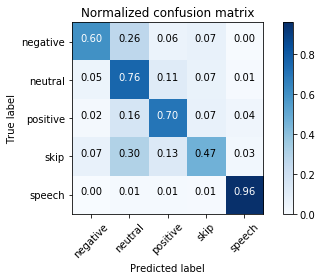

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(targets, pred_classes)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data_clas.train_ds.classes,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data_clas.train_ds.classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()